In [16]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import joblib
import matplotlib.pyplot as plt

# Define directories
cat_dir = r'C:\Users\91910\Untitled Folder\directory to extract\train\cats'  
dog_dir = r'C:\Users\91910\Untitled Folder\directory to extract\train\dogs'  

# Parameters
image_size = 64  # Resize images to 64x64

# Function to load and preprocess images from a folder
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in tqdm(os.listdir(folder)):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (image_size, image_size))
            images.append(img)
            labels.append(label)
    return images, labels

# Load cat images
cat_images, cat_labels = load_images_from_folder(cat_dir, 0)  # Label 0 for cat

# Load dog images
dog_images, dog_labels = load_images_from_folder(dog_dir, 1)  # Label 1 for dog

# Combine the data
images = np.array(cat_images + dog_images)
labels = np.array(cat_labels + dog_labels)

# Normalize the images
images = images / 255.0

# Flatten the images for SVM
images = images.reshape(images.shape[0], -1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Create an SVM model
svm = SVC(kernel='linear', random_state=42)

# Train the model
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Save the model
joblib.dump(svm, 'svm_dogs_vs_cats.pkl')

# Load the model
svm = joblib.load('svm_dogs_vs_cats.pkl')

# Function to predict on a new image and display
def predict_and_display(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_display = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for display
    img_resized = cv2.resize(img, (image_size, image_size))
    img_resized = img_resized / 255.0
    img_flattened = img_resized.reshape(1, -1)
    prediction = svm.predict(img_flattened)
    label = 'Dog' if prediction[0] == 1 else 'Cat'
    
    # Plot the image with prediction
    plt.imshow(img_display)
    plt.axis('off')
    plt.title(f'Prediction: {label}')
    plt.show()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 277/277 [00:01<00:00, 241.35it/s]


Accuracy: 0.4954954954954955
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.56      0.55        61
           1       0.44      0.42      0.43        50

    accuracy                           0.50       111
   macro avg       0.49      0.49      0.49       111
weighted avg       0.49      0.50      0.49       111



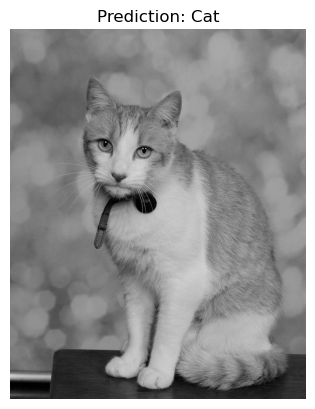

In [17]:

predict_and_display(r'C:\Users\91910\Untitled Folder\directory to extract\test\cat_s\cat_1.jpg')


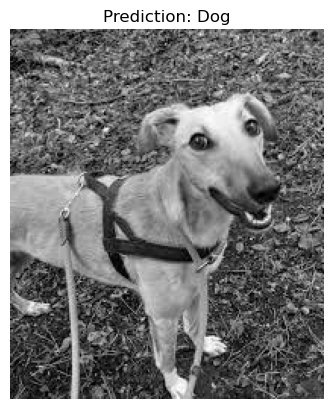

In [18]:
predict_and_display(r'C:\Users\91910\Untitled Folder\directory to extract\test\dogs\dog_114.jpg')